# Get:
- MLD2015
- MLD2019
- X21°C Isotherm

In [1]:
# 1. read MLD forcings:
# where to get Fluoresence & HPLC data from?
Upwelling <- read.csv("Data/Upwelling_Final-Feb2018.csv",sep=';',dec=',')

In [2]:
Upwelling$Date <- as.Date(Upwelling$Date,format='%m.%d.%Y')

In [3]:
Upwelling$date = format(Upwelling$Date, "%Y-%m")

In [4]:
head(Upwelling$date)

[1] "1995-11" "1995-12" "1996-01" "1996-02" "1996-03" "1996-04"

# Calculate my own x25.8 isopycnal

In [6]:
require(ncdf4, warn.conflicts = FALSE);
require(ggplot2, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);
require(tidyverse, warn.conflicts = FALSE);
require(scales)
require(oce)

Loading required package: ncdf4
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: cowplot

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: tidyverse
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.3  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats

In [7]:
# open a NetCDF file
ctdat <- nc_open("Data/ctd.netcdf")

#print(niskdat)

# Read entire ncdf file to r DataFrame

In [8]:
ctdat_df <- data.frame("Num" = 1:ctdat$dim$unlimited$len)
print('start')
for(i in 1:ctdat$nvars){
    #print(i)
    ctdat_df[paste(attributes(ctdat$var)$names[i])] <- ncvar_get(ctdat, attributes(ctdat$var)$names[i])
}
print('done reading')
head(ctdat_df)

[1] "start"
[1] "done reading"


Num cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date       Latitude
1 1   1         93HG_001   CAR-001    1995 11    8   1995-11-08 10.5    
2 2   1         93HG_001   CAR-001    1995 11    8   1995-11-08 10.5    
3 3   1         93HG_001   CAR-001    1995 11    8   1995-11-08 10.5    
4 4   1         93HG_001   CAR-001    1995 11    8   1995-11-08 10.5    
5 5   1         93HG_001   CAR-001    1995 11    8   1995-11-08 10.5    
6 6   1         93HG_001   CAR-001    1995 11    8   1995-11-08 10.5    
  Longitude ... temp   sal    potemp sigma_t sigma_0 O2_ml_L beam_cp beam_att
1 -64.667   ...        36.612                                                
2 -64.667   ... 27.522 36.612 27.522 23.764  23.764  3.964                   
3 -64.667   ... 27.489 36.612 27.488 23.775  23.775  3.978                   
4 -64.667   ... 27.465 36.614 27.464 23.782  23.782  3.984                   
5 -64.667   ... 27.458 36.613 27.456 23.786  23.787  3.990                   
6 -64.667   ... 27.454 36.613 27.452 23.787  23.787  3.992                   
  fluor_CTD fluor_chla
1 0.173               
2 0.176               
3 0.166               
4 0.164               
5 0.170               
6 0.175

In [9]:
cat(names(ctdat_df))

Num cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date Latitude Longitude press depth temp sal potemp sigma_t sigma_0 O2_ml_L beam_cp beam_att fluor_CTD fluor_chla

In [10]:
ctdat_df$date <- as.Date(ctdat_df$Date)

ctdat_df$press <- as.numeric(ctdat_df$press)
ctdat_df$depth <- as.numeric(ctdat_df$depth)
ctdat_df$temp <- as.numeric(ctdat_df$temp)
ctdat_df$sal <- as.numeric(ctdat_df$sal)
ctdat_df$potemp <- as.numeric(ctdat_df$potemp) 
ctdat_df$sigma_t <- as.numeric(ctdat_df$sigma_t)
ctdat_df$sigma_0 <- as.numeric(ctdat_df$sigma_0)
ctdat_df$O2_ml_L <- as.numeric(ctdat_df$O2_ml_L)
ctdat_df$beam_cp <- as.numeric(ctdat_df$beam_cp)
ctdat_df$beam_att <- as.numeric(ctdat_df$beam_att)
ctdat_df$fluor_CTD <- as.numeric(ctdat_df$fluor_CTD)
ctdat_df$fluor_chla <- as.numeric(ctdat_df$fluor_chla)

In [11]:
ctdat_df[ctdat_df>10000000000]=NA

Warning message:
“Removed 265276 rows containing missing values (geom_point).”

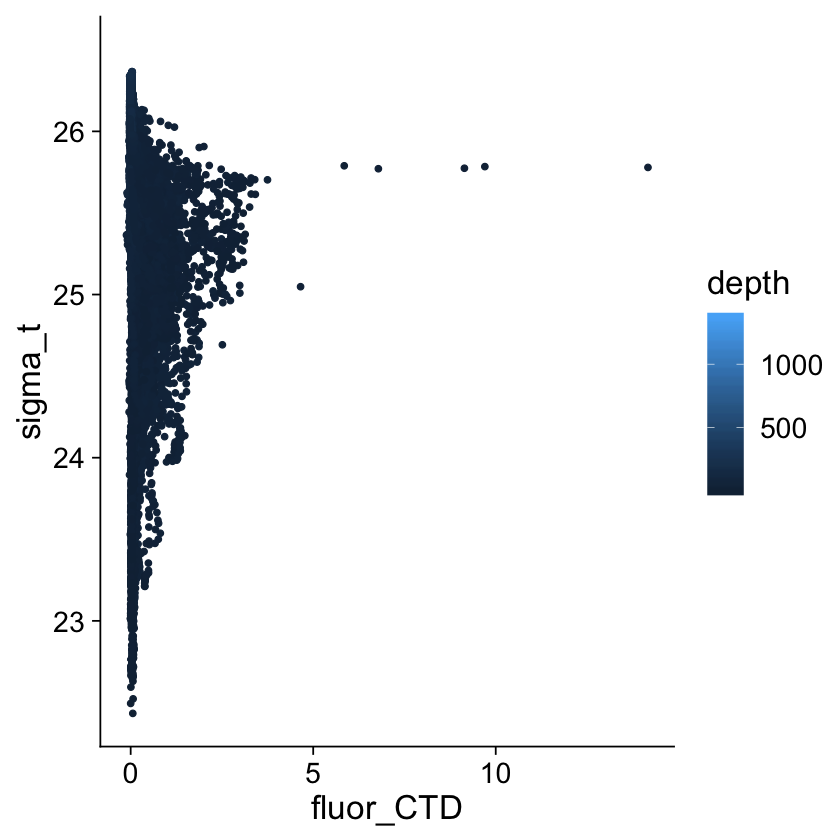

In [11]:
ggplot(data=ctdat_df, aes(x=fluor_CTD, y=sigma_t, col=depth)) + geom_point() +theme_cowplot(20) #+  scale_y_continuous(trans = "reverse") #+ ylim(100,0) #+ xlim(0,10)

In [61]:
CTDx258 <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_t >= 25.8) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [103]:
TEMPx258 <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = temp <= 21) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [62]:
head(CTDx258)

Num  cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date       Latitude
1   66 1         NA         NA         1995 11     8  1995-11-08 10.500  
2  653 2         NA         NA         1995 12    14  1995-12-14 10.500  
3 1275 3         NA         NA         1996  1    13  1996-01-13 10.500  
4 1848 4         NA         NA         1996  2    14  1996-02-14 10.492  
5 2464 5         NA         NA         1996  3    13  1996-03-13 10.500  
6 3773 6         NA         NA         1996  4    16  1996-04-16 10.500  
  Longitude ... potemp sigma_t sigma_0 O2_ml_L beam_cp beam_att fluor_CTD
1 -64.667   ... 21.029 25.820  25.827  2.633   NA      NA          NA    
2 -64.667   ... 23.962 25.806  25.093     NA   NA      NA       0.647    
3 -64.667   ... 21.257 25.807  25.812  2.265   NA      NA       0.045    
4 -64.668   ... 21.278 25.818  25.823  2.219   NA      NA       0.079    
5 -64.667   ... 21.323 25.807  25.809  2.653   NA      NA       0.098    
6 -64.667   ... 21.198 25.811  25.813     NA   NA      NA          NA    
  fluor_chla date       belowmld
1 NA         1995-11-08 TRUE    
2 NA         1995-12-14 TRUE    
3 NA         1996-01-13 TRUE    
4 NA         1996-02-14 TRUE    
5 NA         1996-03-13 TRUE    
6 NA         1996-04-16 TRUE

In [63]:
options(repr.plot.width=16, repr.plot.height=10)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


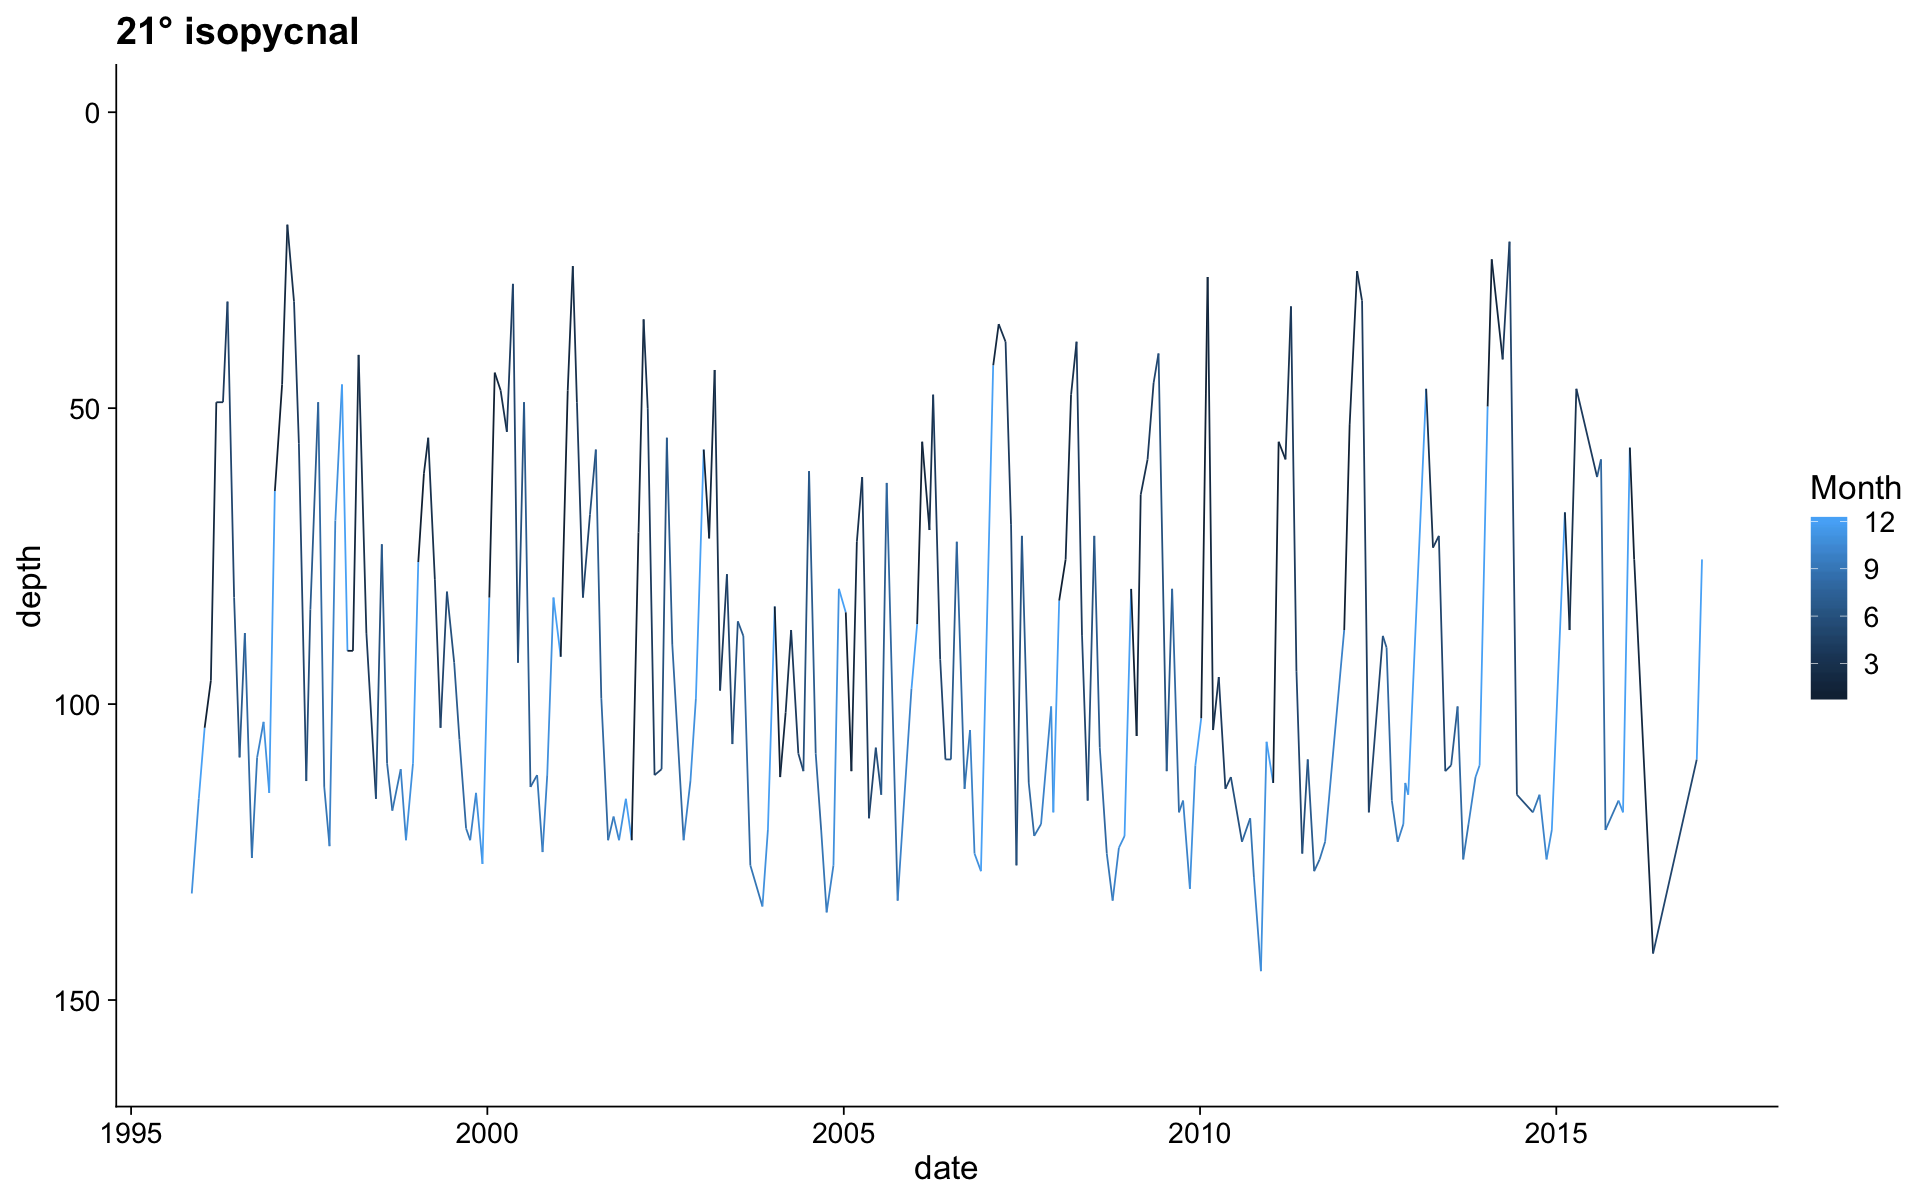

In [107]:
ggplot()+geom_line(data=TEMPx258,aes(x=date,y=depth, col=Month)) + 
theme_cowplot(20) +  scale_y_continuous(trans = "reverse") + ylim(160,0) + ggtitle('21° isopycnal')

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


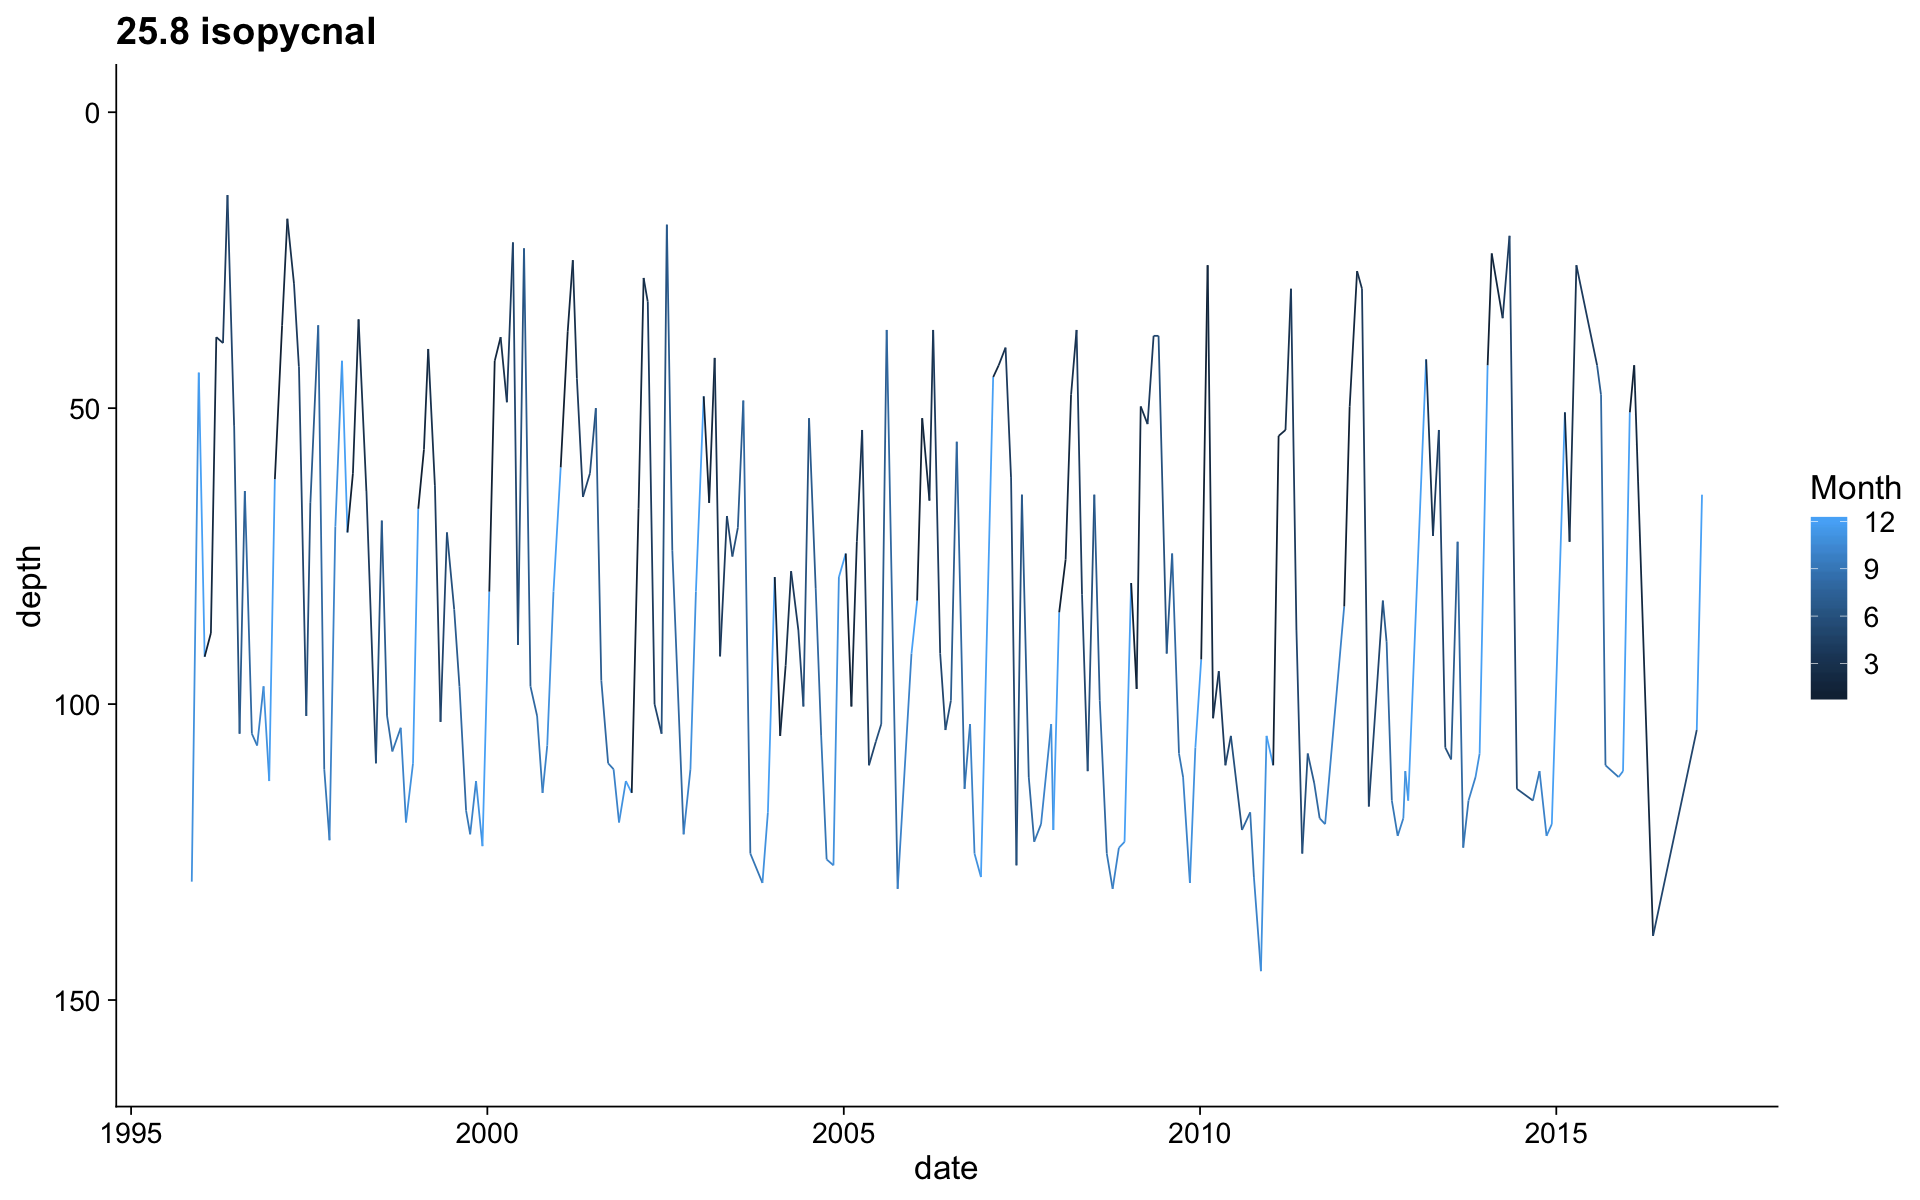

In [108]:
ggplot()+geom_line(data=CTDx258,aes(x=date,y=depth, col=Month)) + 
theme_cowplot(20) +  scale_y_continuous(trans = "reverse") + ylim(160,0) + ggtitle('25.8 isopycnal')

In [65]:
head(CTDx258)

Num  cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date       Latitude
1   66 1         NA         NA         1995 11     8  1995-11-08 10.500  
2  653 2         NA         NA         1995 12    14  1995-12-14 10.500  
3 1275 3         NA         NA         1996  1    13  1996-01-13 10.500  
4 1848 4         NA         NA         1996  2    14  1996-02-14 10.492  
5 2464 5         NA         NA         1996  3    13  1996-03-13 10.500  
6 3773 6         NA         NA         1996  4    16  1996-04-16 10.500  
  Longitude ... potemp sigma_t sigma_0 O2_ml_L beam_cp beam_att fluor_CTD
1 -64.667   ... 21.029 25.820  25.827  2.633   NA      NA          NA    
2 -64.667   ... 23.962 25.806  25.093     NA   NA      NA       0.647    
3 -64.667   ... 21.257 25.807  25.812  2.265   NA      NA       0.045    
4 -64.668   ... 21.278 25.818  25.823  2.219   NA      NA       0.079    
5 -64.667   ... 21.323 25.807  25.809  2.653   NA      NA       0.098    
6 -64.667   ... 21.198 25.811  25.813     NA   NA      NA          NA    
  fluor_chla date       belowmld
1 NA         1995-11-08 TRUE    
2 NA         1995-12-14 TRUE    
3 NA         1996-01-13 TRUE    
4 NA         1996-02-14 TRUE    
5 NA         1996-03-13 TRUE    
6 NA         1996-04-16 TRUE

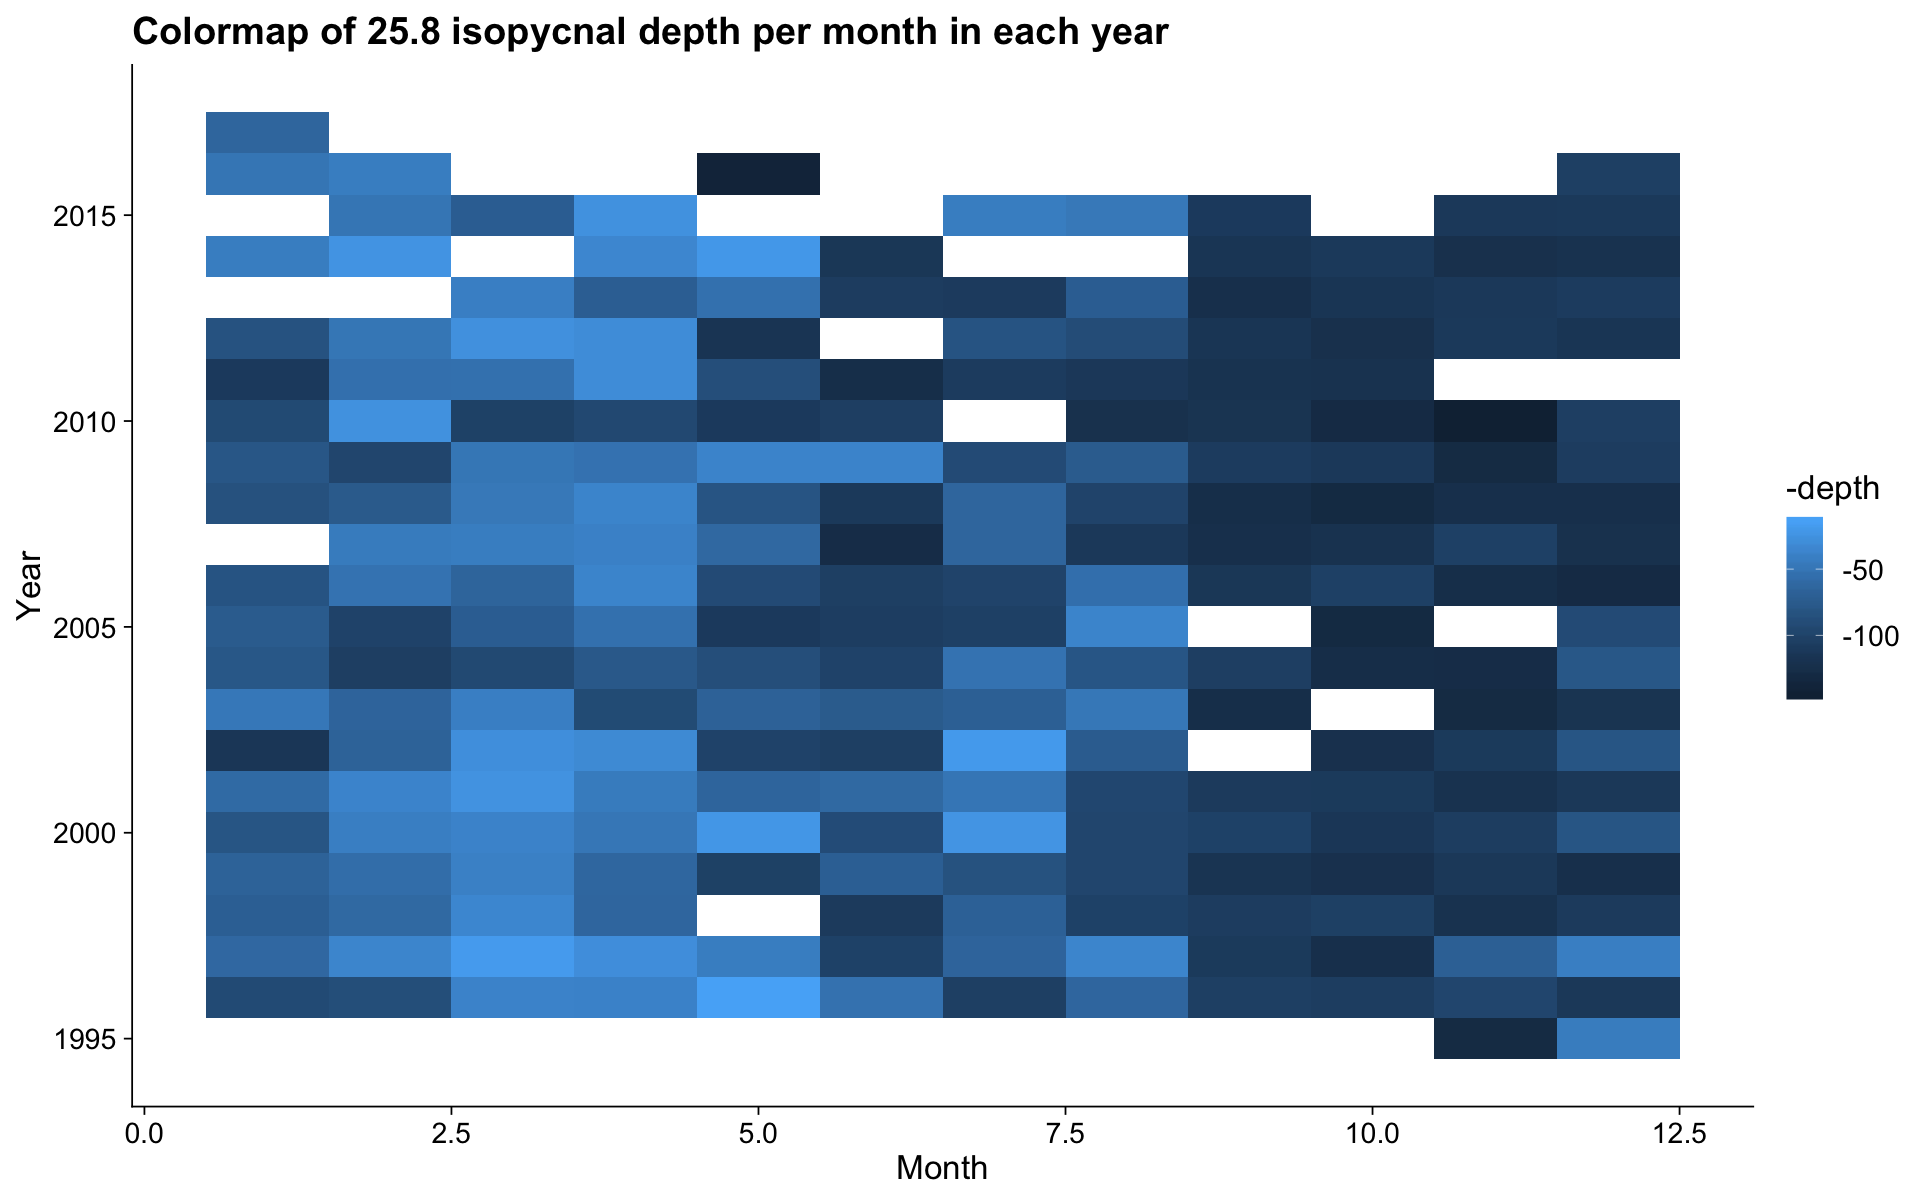

In [66]:
ggplot()+geom_tile(data=CTDx258,aes(x=Month,y=Year, fill=-depth)) + theme_cowplot(20) +
ggtitle('Colormap of 25.8 isopycnal depth per month in each year')
#+  scale_y_continuous(trans = "reverse") #+ ylim(160,0) + ggtitle('25.8 isopycnal')

In [67]:
#year vs month of the year, col = depth

In [68]:
mld_depth <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [69]:
head(mld_depth)

Num  cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date       Latitude
1   13 1         NA         NA         1995 11     8  1995-11-08 10.500  
2  640 2         NA         NA         1995 12    14  1995-12-14 10.500  
3 1234 3         NA         NA         1996  1    13  1996-01-13 10.500  
4 1809 4         NA         NA         1996  2    14  1996-02-14 10.492  
5 2436 5         NA         NA         1996  3    13  1996-03-13 10.500  
6 3741 6         NA         NA         1996  4    16  1996-04-16 10.500  
  Longitude ... potemp sigma_t sigma_0 O2_ml_L beam_cp beam_att fluor_CTD
1 -64.667   ... 26.711 23.982  23.984  3.786   NA      NA       0.373    
2 -64.667   ... 25.330 24.712  24.684     NA   NA      NA       0.051    
3 -64.667   ... 23.993 25.093  25.093  2.967   NA      NA       1.250    
4 -64.668   ... 23.607 25.247  25.248  3.149   NA      NA       1.370    
5 -64.667   ... 22.227 25.566  25.567  3.591   NA      NA       2.910    
6 -64.667   ... 22.685 25.489  25.490     NA   NA      NA          NA    
  fluor_chla date       belowmld
1 NA         1995-11-08 TRUE    
2 NA         1995-12-14 TRUE    
3 NA         1996-01-13 TRUE    
4 NA         1996-02-14 TRUE    
5 NA         1996-03-13 TRUE    
6 NA         1996-04-16 TRUE

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


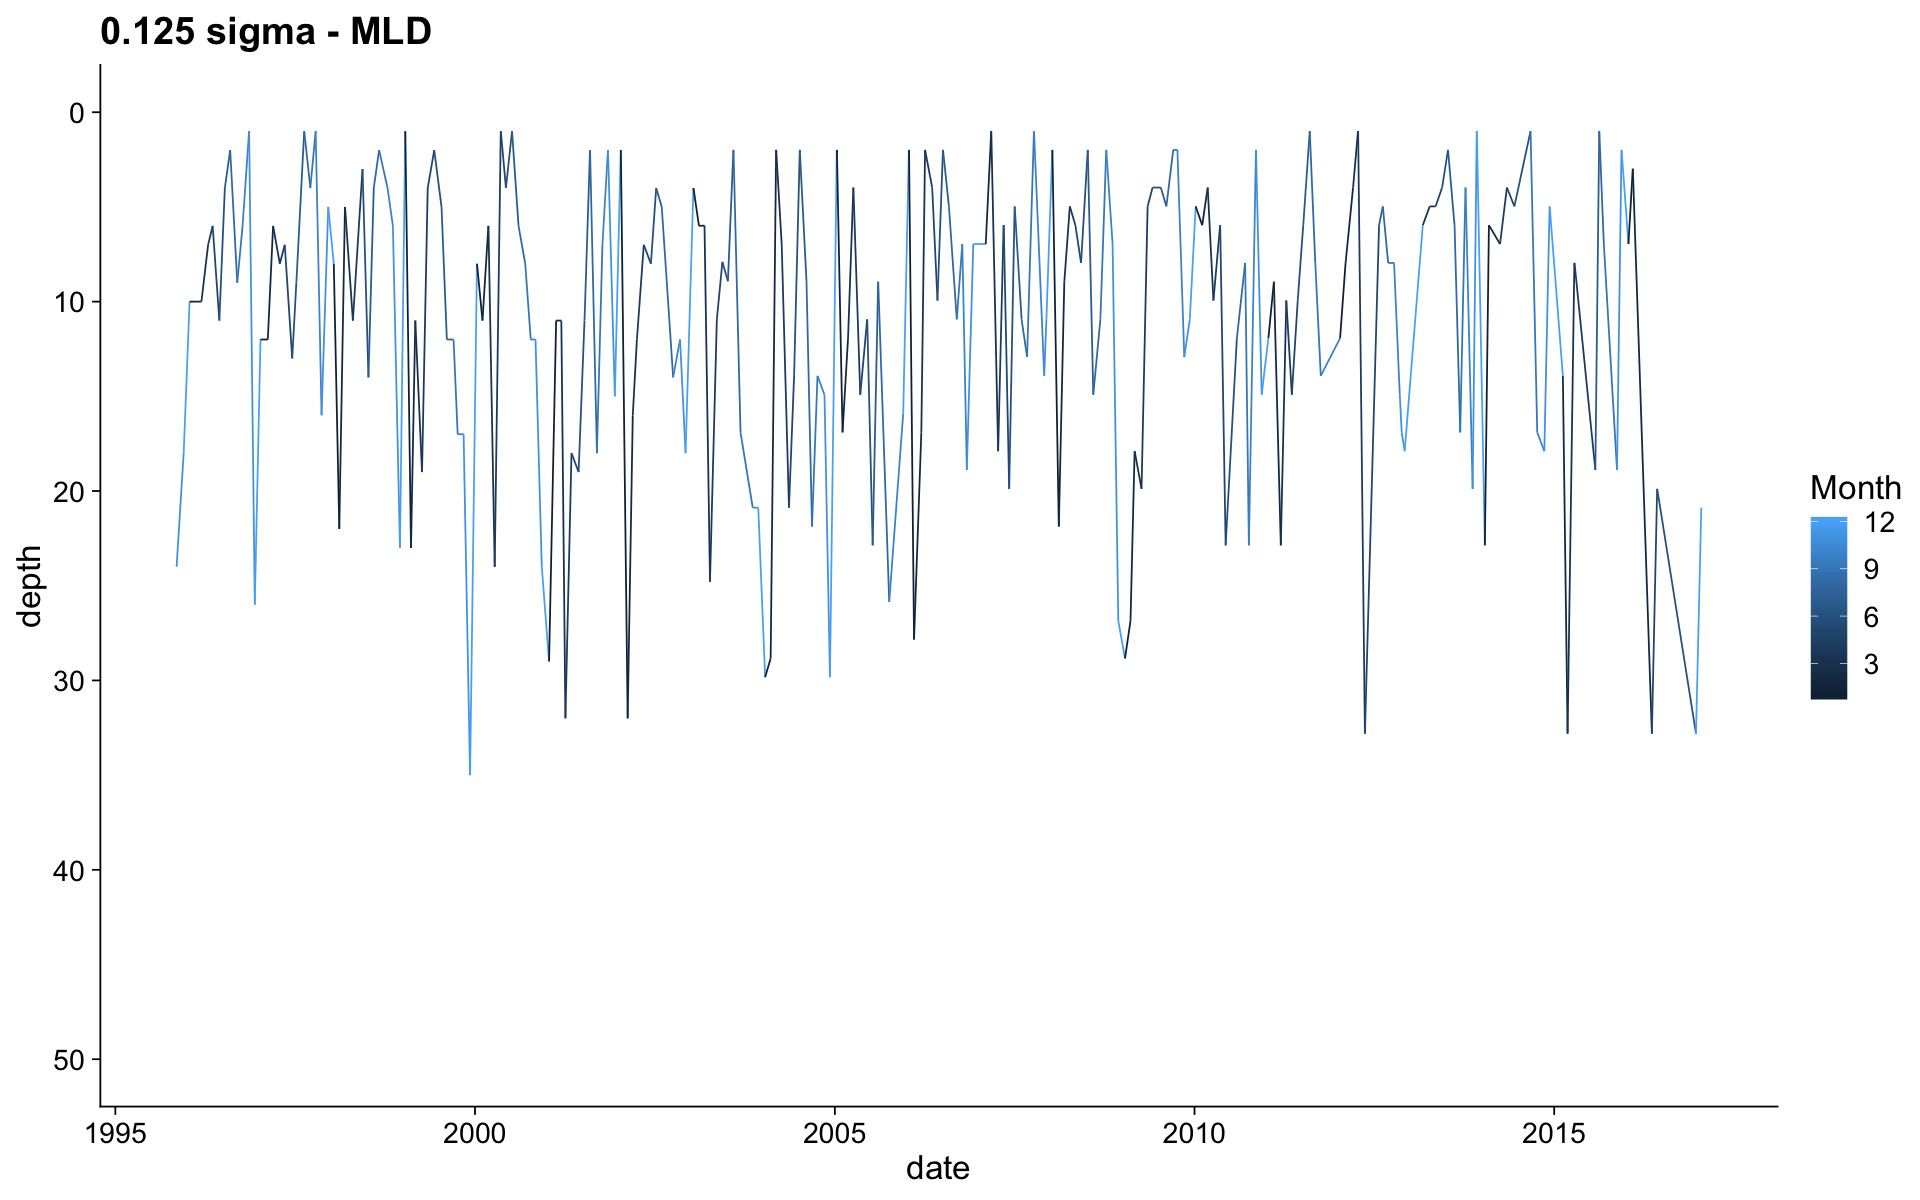

In [21]:
ggplot()+geom_line(data=mld_depth,aes(x=date,y=depth, col=Month)) + theme_cowplot(20) +  scale_y_continuous(trans = "reverse") + ylim(50,0) + ggtitle('0.125 sigma - MLD')

# check regimes for isopycnal differences

In [22]:
CTDx258$value <- CTDx258$depth

In [23]:
#split data into two regimes:
CTDx258dfR1 <- CTDx258[!CTDx258$date>as.Date('2000-10-30') & !CTDx258$date<as.Date('1996-01-01'),]
CTDx258dfR2 <- CTDx258[!CTDx258$date<as.Date('2006-07-31') & !CTDx258$date>as.Date('2010-12-31'),]

In [24]:
# create day of year and month columsn for aggregate plotting
CTDx258dfR1$dyear <- as.Date(format(CTDx258dfR1$date, format="%m-%d"),format="%m-%d")
CTDx258dfR2$dyear <- as.Date(format(CTDx258dfR2$date, format="%m-%d"),format="%m-%d")
CTDx258dfR1$month <- format(CTDx258dfR1$date, format="%m")
CTDx258dfR2$month <- format(CTDx258dfR2$date, format="%m")

In [25]:
head(CTDx258dfR1)

Num  cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date       Latitude
1 1275 3         NA         NA         1996 1     13  1996-01-13 10.500  
2 1848 4         NA         NA         1996 2     14  1996-02-14 10.492  
3 2464 5         NA         NA         1996 3     13  1996-03-13 10.500  
4 3773 6         NA         NA         1996 4     16  1996-04-16 10.500  
5 5053 7         NA         NA         1996 5      9  1996-05-09 10.500  
6 5755 8         NA         NA         1996 6     12  1996-06-12 10.500  
  Longitude ... O2_ml_L beam_cp beam_att fluor_CTD fluor_chla date      
1 -64.667   ... 2.265   NA      NA       0.045     NA         1996-01-13
2 -64.668   ... 2.219   NA      NA       0.079     NA         1996-02-14
3 -64.667   ... 2.653   NA      NA       0.098     NA         1996-03-13
4 -64.667   ...    NA   NA      NA          NA     NA         1996-04-16
5 -64.667   ...    NA   NA      NA       0.274     NA         1996-05-09
6 -64.667   ...    NA   NA      NA       0.146     NA         1996-06-12
  belowmld value dyear      month
1 TRUE     92    2020-01-13 01   
2 TRUE     88    2020-02-14 02   
3 TRUE     38    2020-03-13 03   
4 TRUE     39    2020-04-16 04   
5 TRUE     14    2020-05-09 05   
6 TRUE     53    2020-06-12 06

In [26]:
CTDx258_1 <- 
ggplot() + geom_point(data=CTDx258dfR1,aes(x=dyear, y=value, col='Regime 1'))+  scale_y_continuous(trans = "reverse", limits = c(160,0), breaks=seq(160,0,-10))+
geom_point(data=CTDx258dfR2,aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('25.8 isopycnal [m]') + xlab('Month of year') + labs(col='Regime') +theme_cowplot(15)

In [27]:
CTDx258_2 <- 
ggplot() + geom_boxplot(data=CTDx258dfR1,aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ scale_y_continuous(trans = "reverse", limits = c(160,0), breaks=seq(160,0,-10))+
geom_boxplot(data=CTDx258dfR2,aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('25.8 isopycnal [m]') + xlab('Month of year') + labs(col='Regime') +theme_cowplot(15)

In [28]:

CTDx258meanR1 <- mean(CTDx258dfR1$value, na.rm=T)
CTDx258meanR2 <- mean(CTDx258dfR2$value, na.rm=T)
CTDx258cvR1 <- sd(CTDx258dfR1$value, na.rm=T)/mean(CTDx258dfR1$value, na.rm=T)
CTDx258cvR2 <- sd(CTDx258dfR2$value, na.rm=T)/mean(CTDx258dfR2$value, na.rm=T)

CTDx258stats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", CTDx258meanR1, CTDx258cvR1, CTDx258meanR2, CTDx258cvR2)) +theme_cowplot(20)
#ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", CTDx258meanR1, CTDx258cvR1, CTDx258meanR2, CTDx258cvR2))

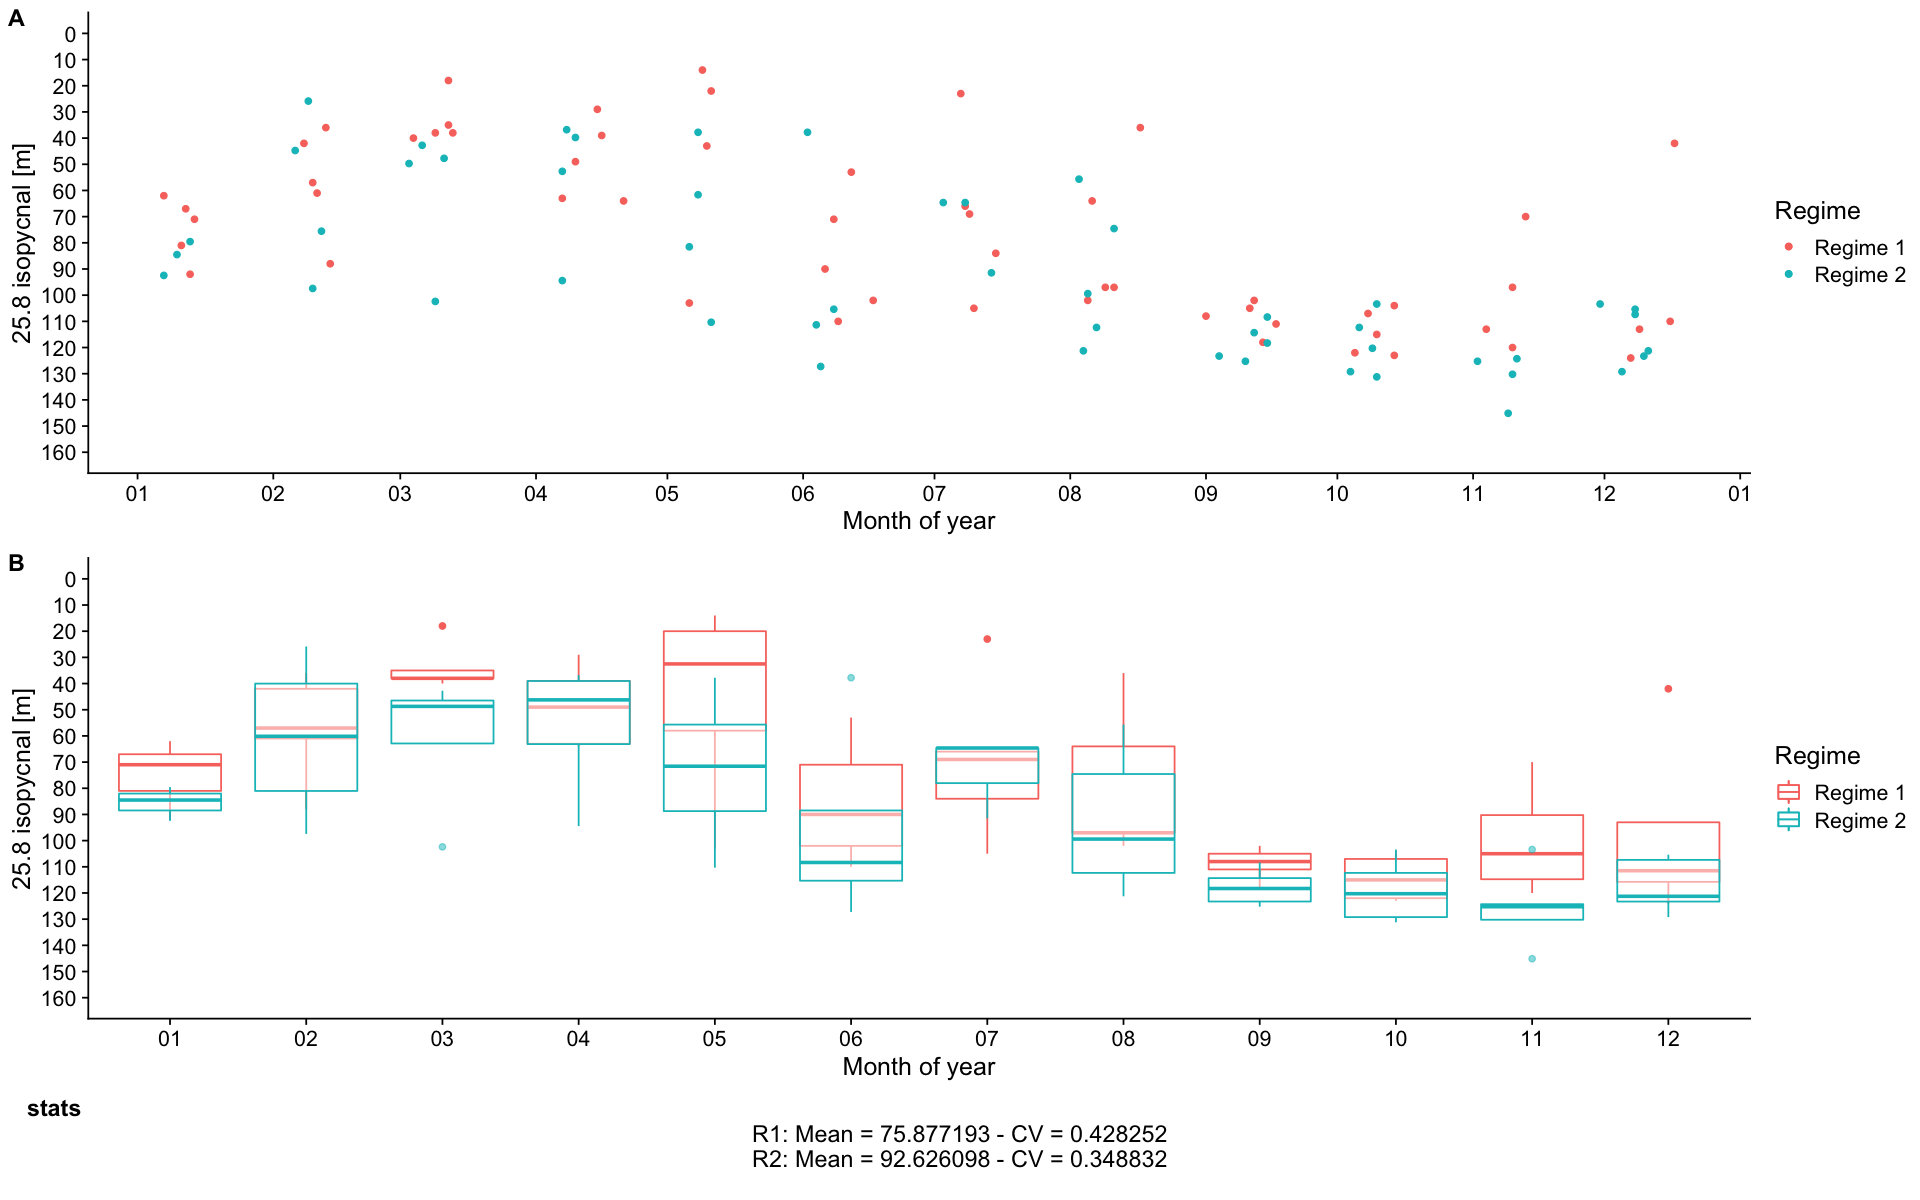

In [29]:
options(repr.plot.width=16, repr.plot.height=10)
plot_grid(CTDx258_1, CTDx258_2, CTDx258stats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [30]:
# plot time series of salinity!



# COMPARE TO PINCKNEY

In [31]:
head(Upwelling)

Cruise Month date    Temp1.7m Sigma.t.1.7m PriPro.1.7m Chl.1.7m
1 1      11    1995-11 27.495   23.720           NA      0.084   
2 2      12    1995-12 25.395   24.590        1.385      0.135   
3 3       1    1996-01 24.250   25.023       14.024      1.385   
4 4       2    1996-02 23.815   25.149        9.785      0.822   
5 5       3    1996-03 22.747   25.423       15.386      3.005   
6 6       4    1996-04 22.747   25.419        4.900      3.405   
  Depth.of.25.8.isopycnal..21degC. Depth.of.25.6.isopycnal..22degC. DateMLD.I
1 130                              118                                       
2 114                               94                                       
3 102                               62                              Jan.96   
4  94                               66                              Feb.96   
5  48                               24                              Mar.96   
6  48                               26                              Apr.96   
  MLD.I Date       MLD.II
1    NA 1995-11-01 24.138
2    NA 1995-12-01 18.103
3 6.000 1996-01-01 10.057
4 6.034 1996-02-01  8.046
5 7.040 1996-03-01 10.057
6 4.023 1996-04-01  7.040

In [32]:
head(CTDx258)

Num  cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date       Latitude
1   66 1         NA         NA         1995 11     8  1995-11-08 10.500  
2  653 2         NA         NA         1995 12    14  1995-12-14 10.500  
3 1275 3         NA         NA         1996  1    13  1996-01-13 10.500  
4 1848 4         NA         NA         1996  2    14  1996-02-14 10.492  
5 2464 5         NA         NA         1996  3    13  1996-03-13 10.500  
6 3773 6         NA         NA         1996  4    16  1996-04-16 10.500  
  Longitude ... sigma_t sigma_0 O2_ml_L beam_cp beam_att fluor_CTD fluor_chla
1 -64.667   ... 25.820  25.827  2.633   NA      NA          NA     NA        
2 -64.667   ... 25.806  25.093     NA   NA      NA       0.647     NA        
3 -64.667   ... 25.807  25.812  2.265   NA      NA       0.045     NA        
4 -64.668   ... 25.818  25.823  2.219   NA      NA       0.079     NA        
5 -64.667   ... 25.807  25.809  2.653   NA      NA       0.098     NA        
6 -64.667   ... 25.811  25.813     NA   NA      NA          NA     NA        
  date       belowmld value
1 1995-11-08 TRUE     130  
2 1995-12-14 TRUE      44  
3 1996-01-13 TRUE      92  
4 1996-02-14 TRUE      88  
5 1996-03-13 TRUE      38  
6 1996-04-16 TRUE      39

In [33]:
mean(CTDx258$depth)

[1] 83.63794

In [34]:
mean(Upwelling$Depth.of.25.8.isopycnal..21degC.,na.rm=T)

[1] 89.72368

In [35]:
#split data into two regimes:
UpwellingdfR1 <- Upwelling[!Upwelling$Date>as.Date('2000-10-30') & !Upwelling$Date<as.Date('1996-01-01'),]
UpwellingdfR2 <- Upwelling[!Upwelling$Date<as.Date('2006-07-31') & !Upwelling$Date>as.Date('2010-12-31'),]

In [36]:
mean(UpwellingdfR1$Depth.of.25.8.isopycnal..21degC.,na.rm=T)
mean(UpwellingdfR2$Depth.of.25.8.isopycnal..21degC.,na.rm=T)

[1] 83.87719

[1] 94.48

In [37]:
mean(CTDx258dfR1$depth)
mean(CTDx258dfR2$depth)

[1] 75.87719

[1] 92.6261

Warning message:
“Removed 1 rows containing missing values (geom_path).”

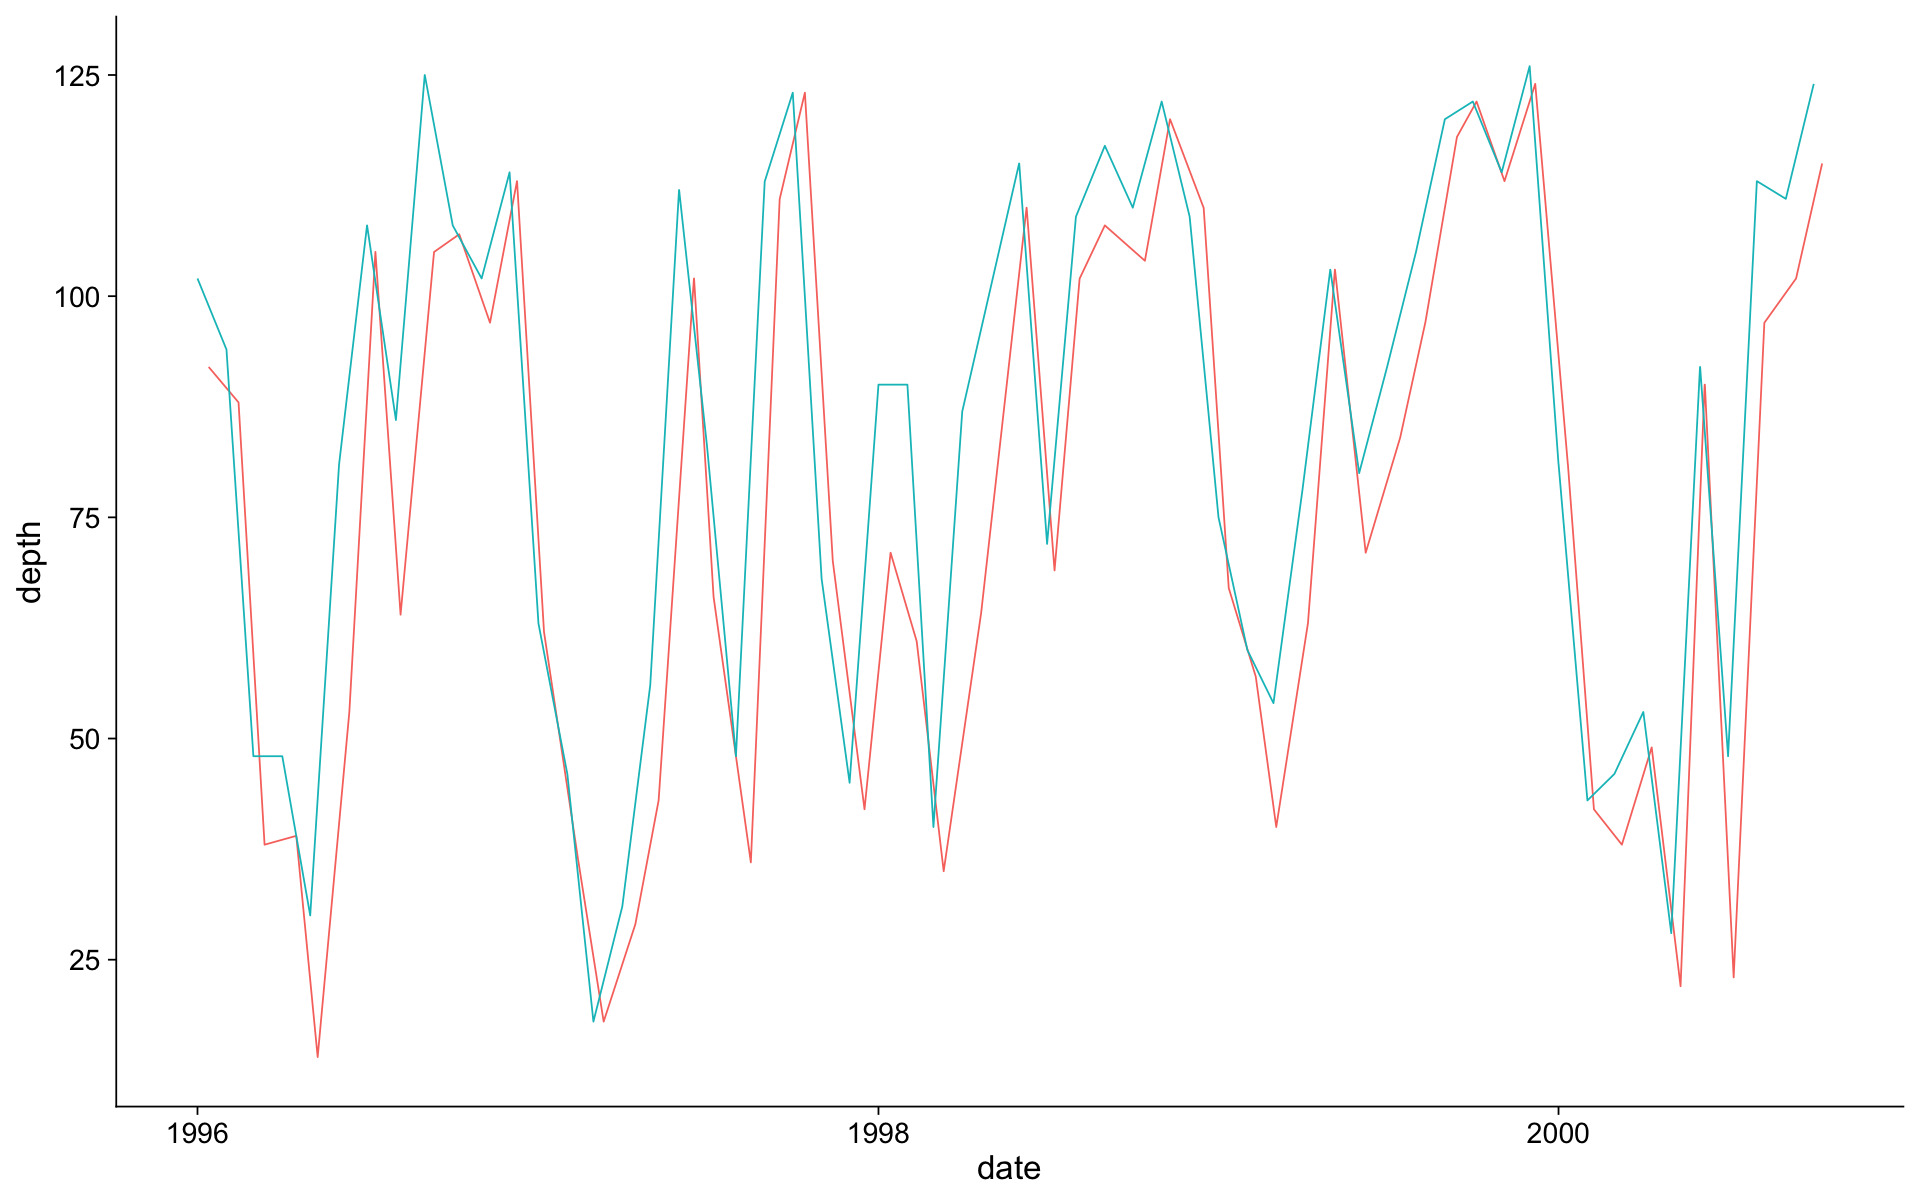

In [38]:
ggplot()+
geom_line(data=CTDx258dfR1, aes(y = depth, x=date,col='own analysis')) + 
geom_line(data=UpwellingdfR1, aes(y=Depth.of.25.8.isopycnal..21degC.,x=Date,col='previous data')) + 
#geom_line(data=df.long, aes(y=value,x=date,col=variable))+
#scale_y_reverse(limits=c(150,0)) +
theme_cowplot(20)+ theme(legend.position="none")

# NOW check salinity signal

In [12]:
cat(names(ctdat_df))

Num cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date Latitude Longitude press depth temp sal potemp sigma_t sigma_0 O2_ml_L beam_cp beam_att fluor_CTD fluor_chla date

In [13]:
head(ctdat_df$sal)

[1] 36.612 36.612 36.612 36.614 36.613 36.613

In [14]:
interpolateDF <- function(DF,func='oce-rr'){
    zz <- seq(0, 100, 1)
    
    if(func=='oce-rr'){
        IntDF <- DF %>%
            group_by(date) %>%
            do(data.frame(value_int = with(.,oceApprox(depth, value, zz, "rr")), depth = zz)) 
        }
    
    return(IntDF)
}

In [1]:
# function to prepare data frame for interpolation
#' 1. rename columns
prep_df_ntrplt <- function(dataframe){
  
  colnames(dataframe) <- c("date", "depth", "var")
  
  return(dataframe)
}


# function to return interpolated data frame:
#' "The function mba.surf returns a surface approximated from a 
#' bivariate scatter of data points using multilevel B-splines."
ntrplt <-function(dataframe, res = 1000, extended=T){
  
  dataframe$date <- decimal_date(dataframe$date)

  mba <- mba.surf(dataframe[,c('date', 'depth', 'var')], no.X = res, no.Y = res, extend = extended) #, m = 3, h = 5)
  dimnames(mba$xyz.est$z) <- list(mba$xyz.est$x, mba$xyz.est$y)
  df3 <- melt(mba$xyz.est$z, varnames = c('date', 'depth'), value.name = 'var')

  return(df3)
}


# function create oceanographic plot from interpolated data frame
#' it plots the original data points on top of the interpolated data 
plt.ocean <-function(df_int,dataframe){
  
  dataframe$date <- decimal_date(dataframe$date)
  
  Fig <-
    ggplot(data=df_int, aes(date, depth)) +
    
    geom_raster(aes(fill = var), interpolate = T, hjust = 0.5, vjust = 0.5) +
    #geom_contour(aes(z = var)) + 
    
    #geom_point(data = dataframe, aes(date, depth), colour = 'white', alpha = 0.5) +
    scale_x_continuous(expand=c(0,0)) +
    scale_y_reverse(expand=c(0,0)) +
    scale_fill_gradientn(colours = matlab.like2(2))
  
  return(Fig)
}

In [2]:
zz <- seq(0, 250, 1)

sal_X <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press < 20) %>% 
  do(data.frame(value_int = with(.,oceApprox(depth, sal, zz, "rr")), depth = zz)) #%>%
  #summarise(meansal = mean(value_int, na.rm=T)) %>% # only 
  #mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  #filter(belowmld == T) %>% # only take "True" values 
  #slice(1) %>% # takes the first occurrence
  #ungroup() #removes grouping

ERROR: Error in ctdat_df %>% group_by(date) %>% do(data.frame(value_int = with(., : could not find function "%>%"


In [99]:
XYZ = data.frame(sal_X$date, sal_X$depth, sal_X$value_int)

XYZ = XYZ[complete.cases(XYZ),]

In [100]:
XYZ2 = prep_df_ntrplt(XYZ)

In [101]:
XYZint = ntrplt(XYZ2)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


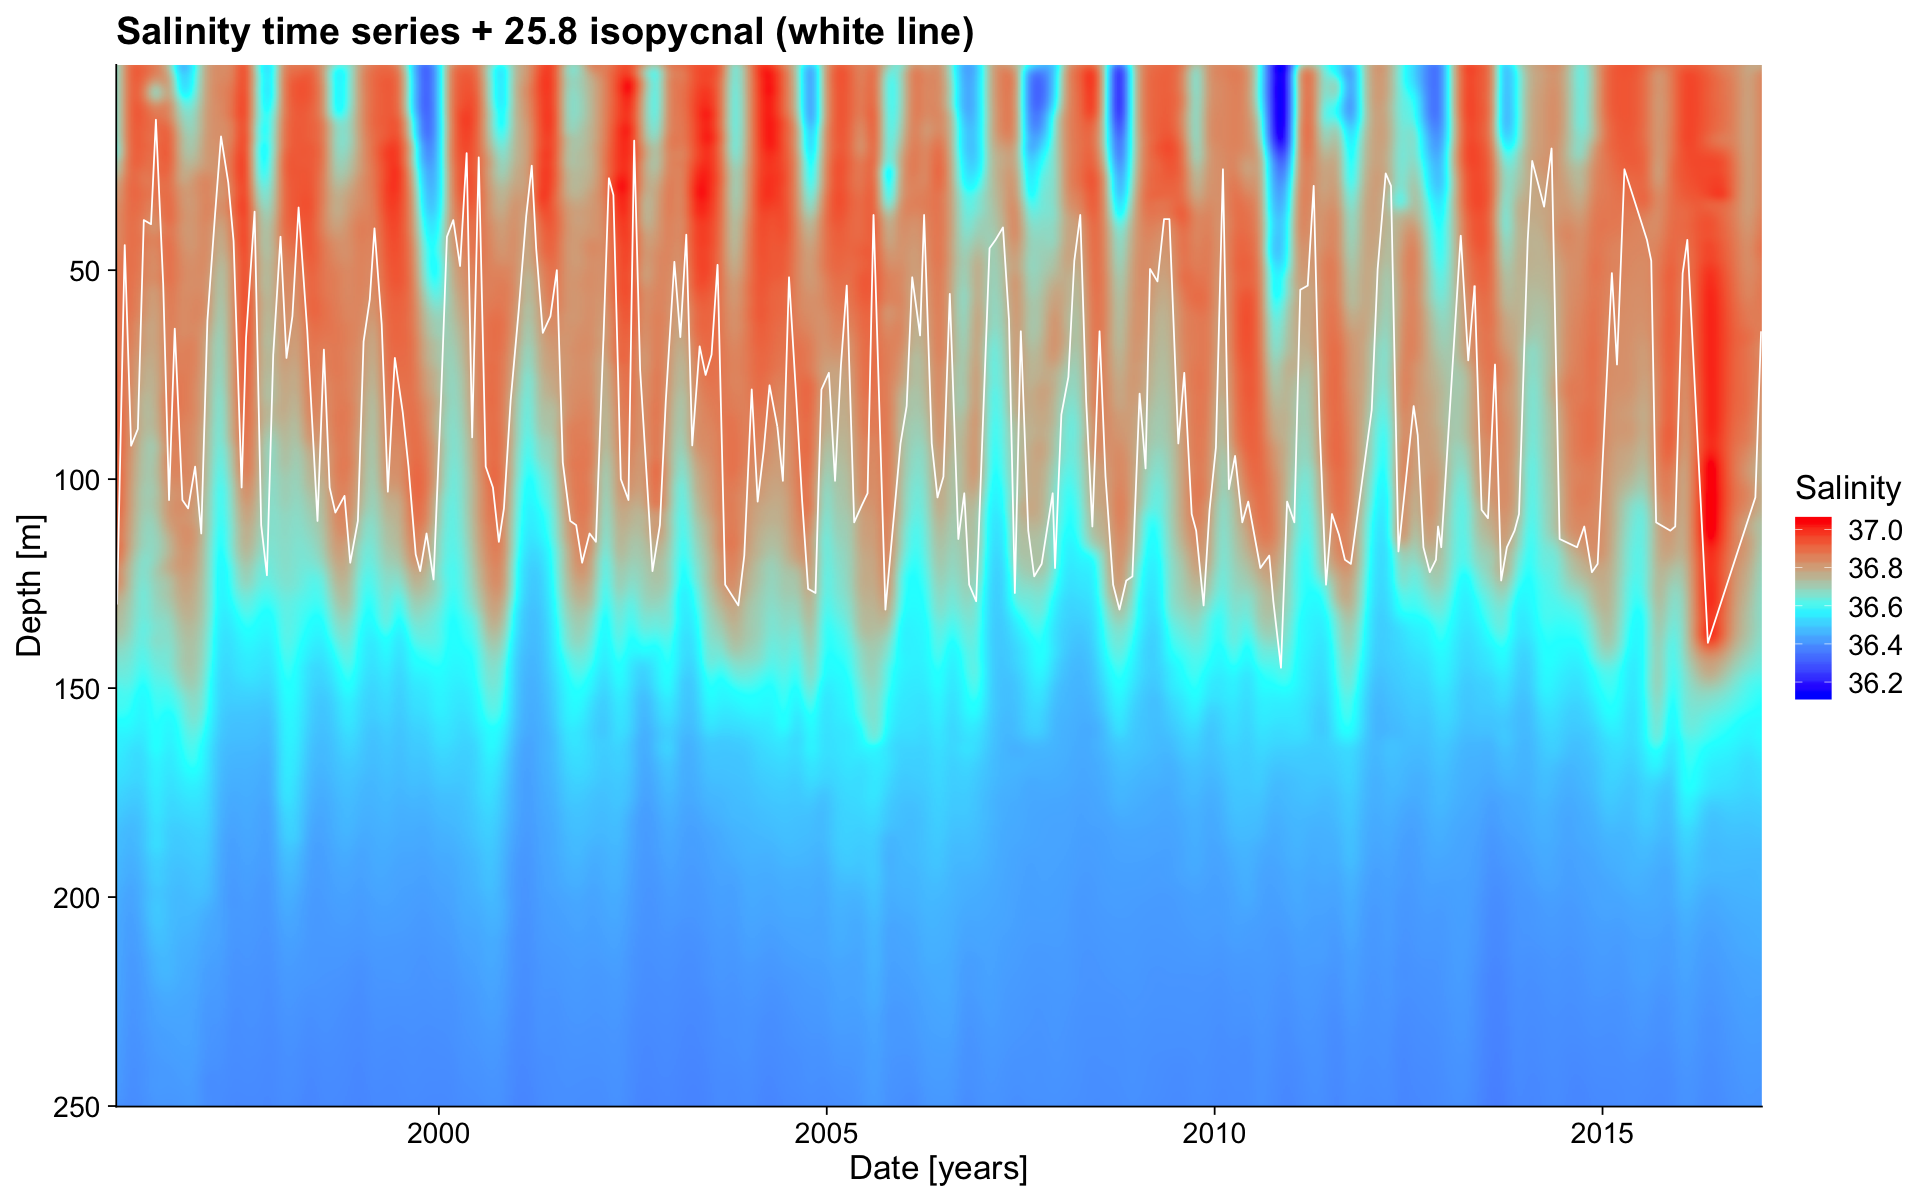

In [102]:
ft = plt.ocean(XYZint,XYZ2) + xlab('Date [years]') + ylab('Depth [m]') + labs(fill='Salinity')


ft + geom_line(data = CTDx258, aes(y=depth,x=decimal_date(date)), col='white')+ scale_x_continuous(limits=layer_scales(ft)$x$range$range, expand=c(0,0))+
theme_cowplot(20)+ggtitle('Salinity time series + 25.8 isopycnal (white line)')


In [45]:
datfr = data.frame(date=ctdat_df$date,depth=ctdat_df$depth,var=ctdat_df$sal)

datfr = datfr[complete.cases(datfr),]


In [41]:
require(lubridate)
require(MBA)
require(reshape2)

require(colorRamps)

Loading required package: colorRamps


In [18]:
#chla1 <- data.frame("date" = TotChlA$Date.1, "press" = TotChlA$Depth.1, "chla" = TotChlA$Chla.1)[complete.cases(data.frame("date" = TotChlA$Date.1, "press" = TotChlA$Depth.1, "chla" = TotChlA$Chla.1)),] 

In [50]:
zz <- seq(0, 100, 1)

sal_avg100 <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  filter(press < 20) %>% 
  do(data.frame(value_int = with(.,oceApprox(depth, sal, zz, "rr")), depth = zz)) %>%
  summarise(meansal = mean(value_int, na.rm=T)) %>% # only 
  #mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  #filter(belowmld == T) %>% # only take "True" values 
  #slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [23]:
head(sal_X)

date       value_int depth
1 1995-11-08       NA  0    
2 1995-11-08 36.61200  1    
3 1995-11-08 36.61200  2    
4 1995-11-08 36.61200  3    
5 1995-11-08 36.61200  4    
6 1995-11-08 36.61288  5

In [51]:
head(sal_avg100)

date       meansal 
1 1995-11-08 36.61232
2 1995-12-14 36.90949
3 1996-01-13 36.90884
4 1996-02-14 36.94834
5 1996-03-13 36.86363
6 1996-04-16 36.89528

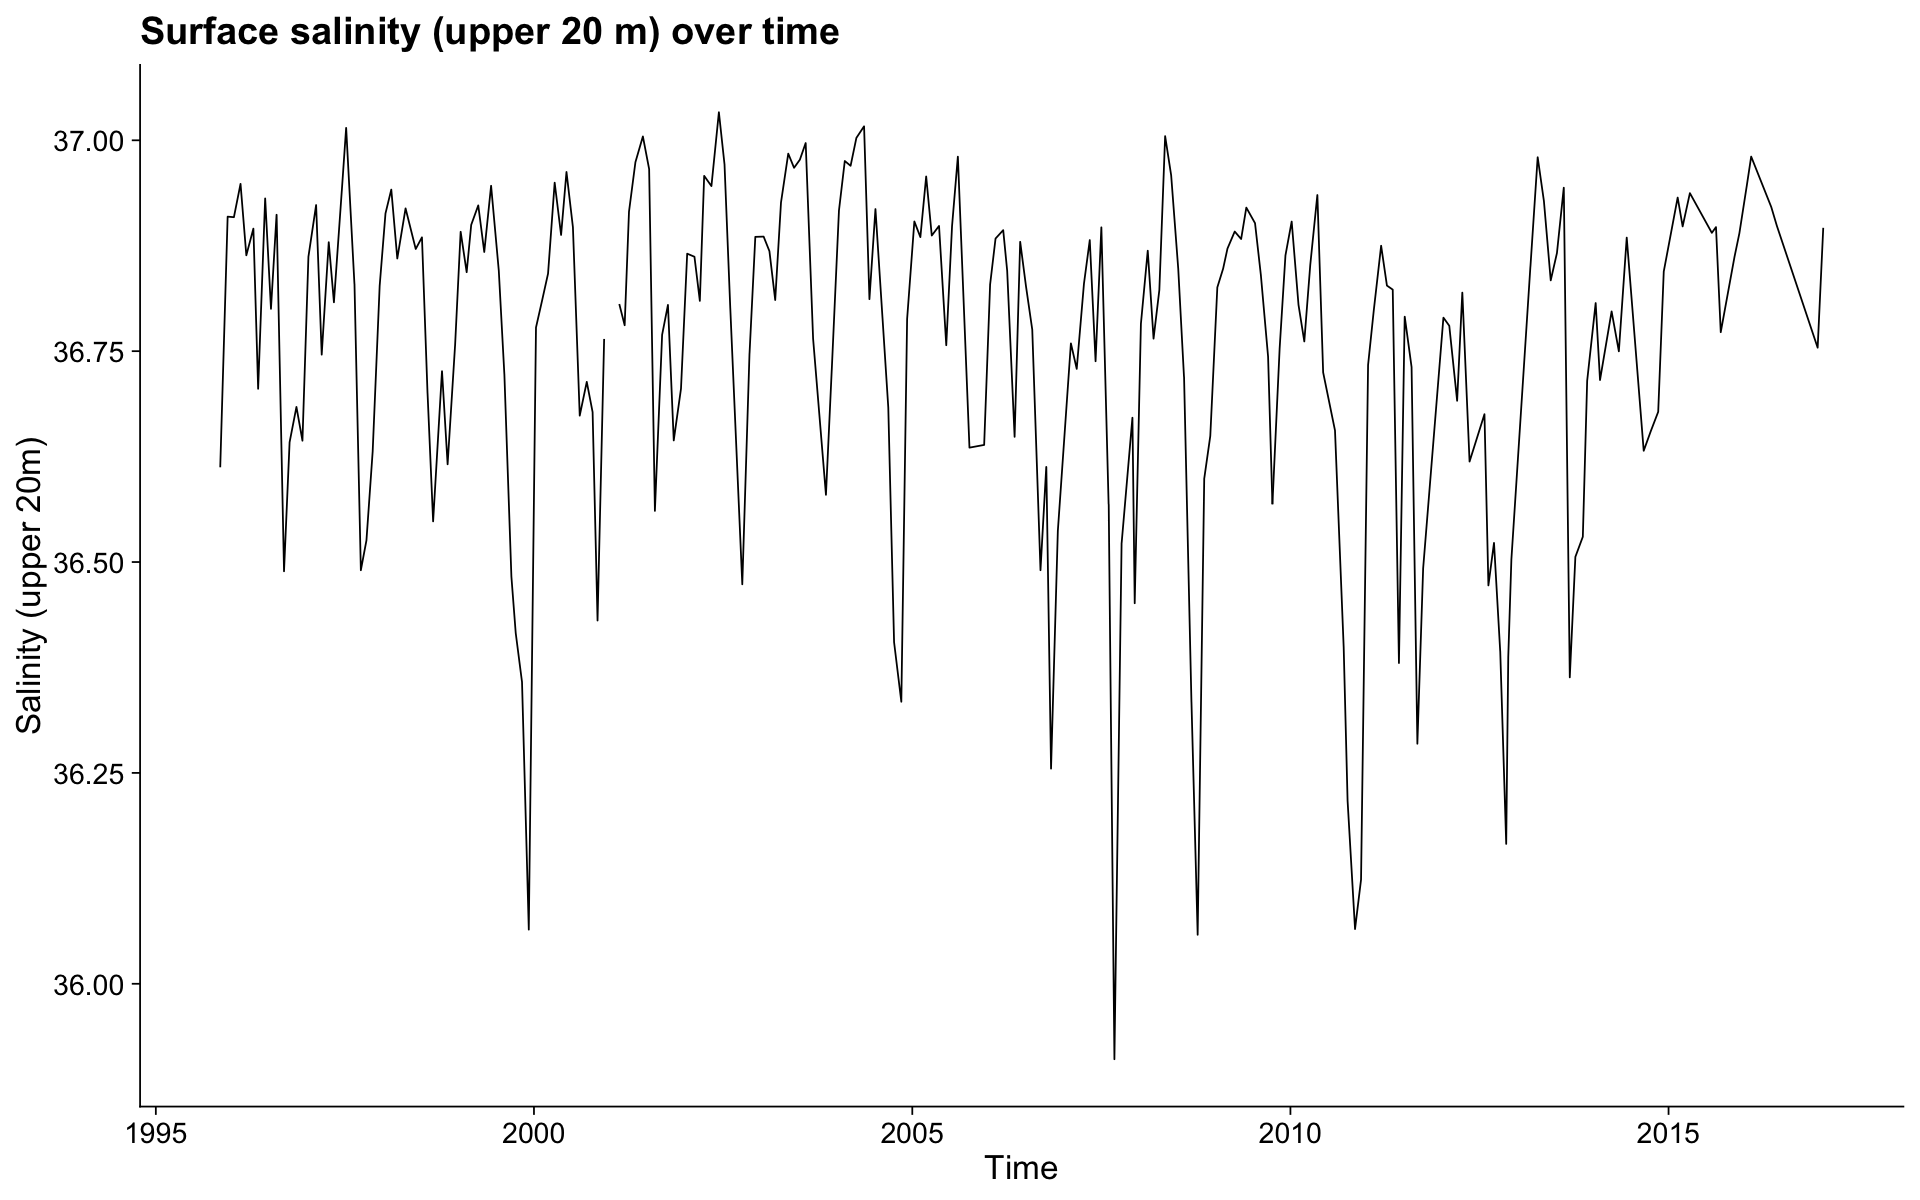

In [78]:
ggplot(data=sal_avg100) + geom_line(aes(x=date,y=meansal))+theme_cowplot(20)+ggtitle('Surface salinity (upper 20 m) over time')+
ylab('Salinity (upper 20m)') + xlab('Time')

In [67]:
sal_avgMOD <- sal_avg100

In [68]:
sal_avgMOD$date = format(sal_avgMOD$date, "%Y-%m")

In [69]:
MLDcheck <- merge(Upwelling,sal_avgMOD)


	Pearson's product-moment correlation

data:  MLDcheck$meansal and MLDcheck$MLD.I
t = 0.054914, df = 213, p-value = 0.9563
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1301065  0.1374971
sample estimates:
        cor 
0.003762639 


Warning message:
“Removed 14 rows containing missing values (geom_point).”

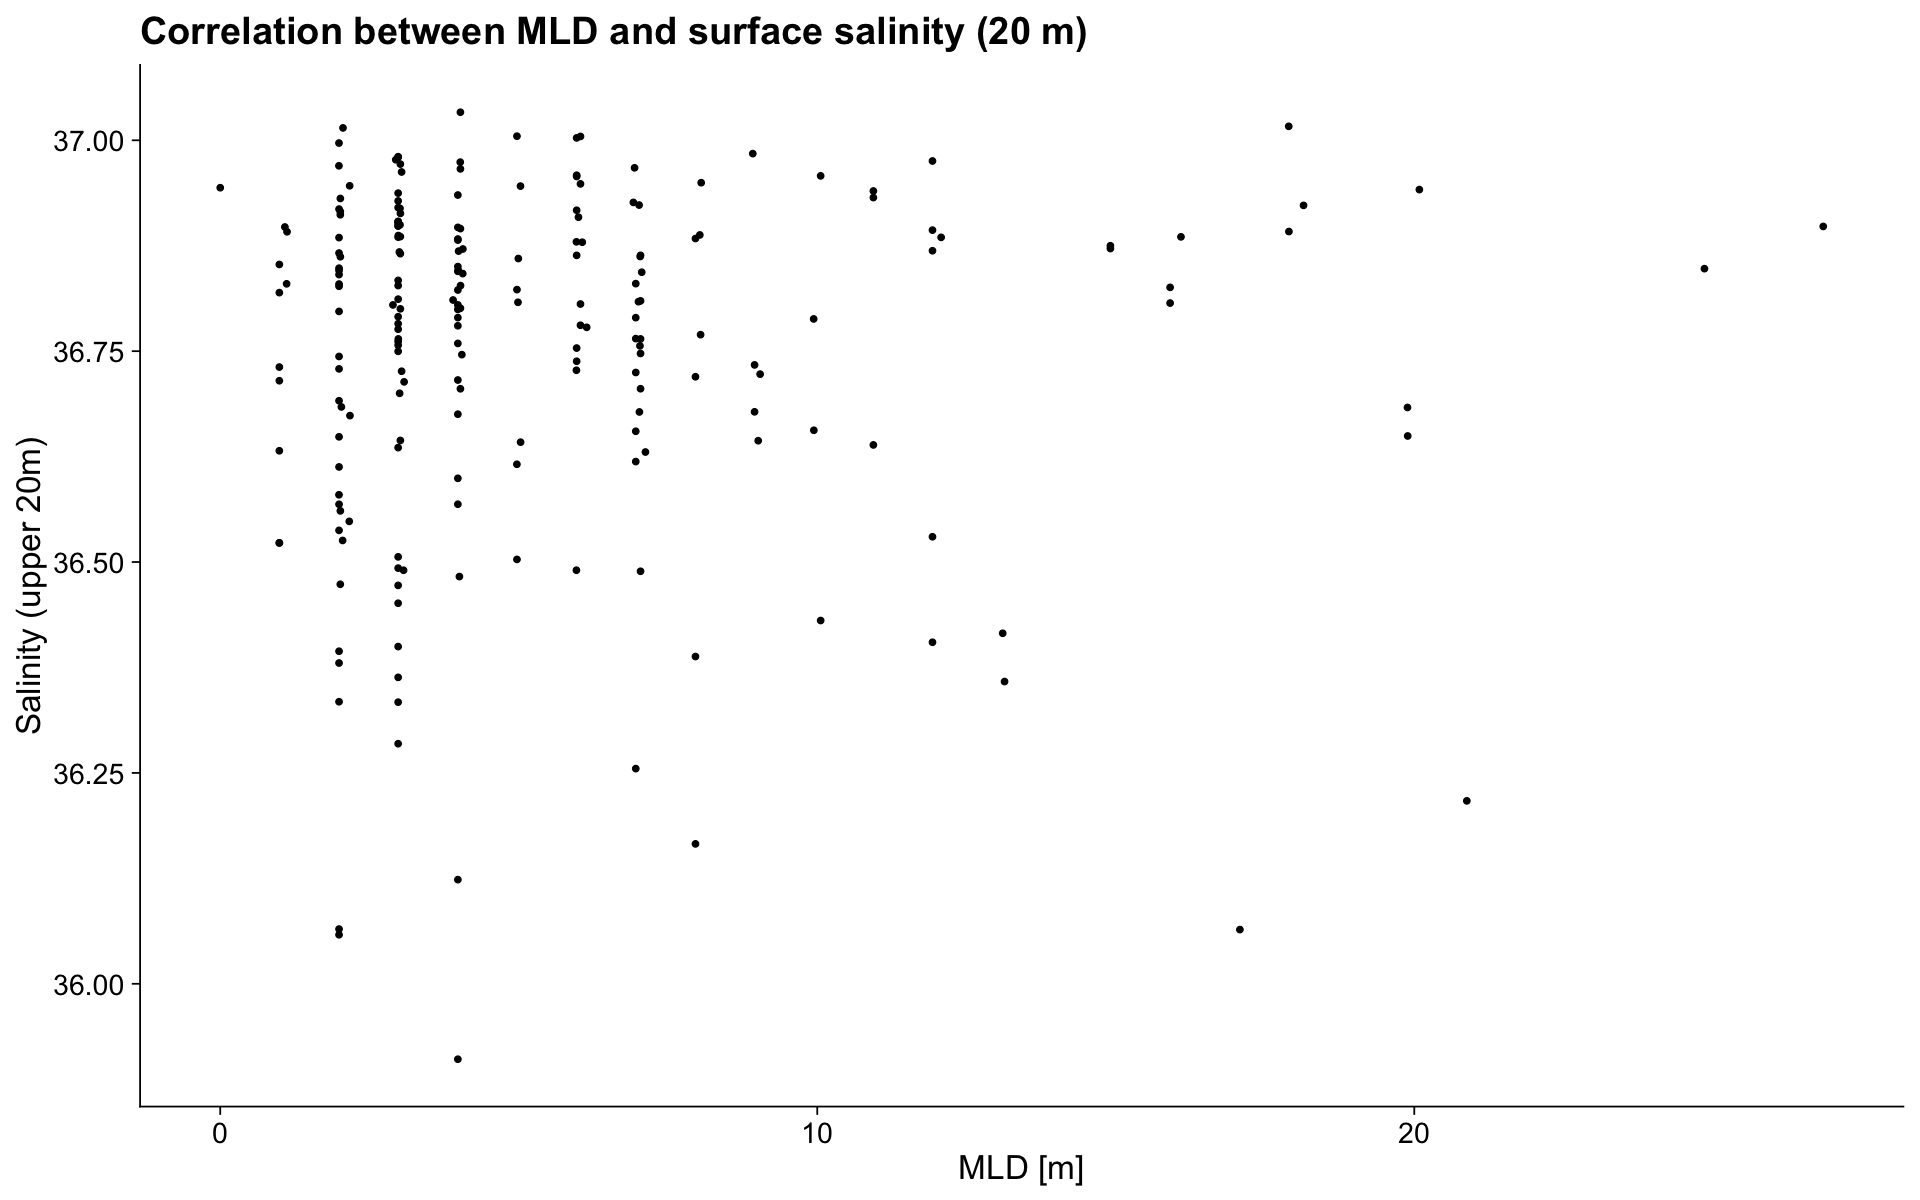

In [76]:
cor.test(MLDcheck$meansal,MLDcheck$MLD.I)

ggplot(data=MLDcheck)+geom_point(aes(x=MLD.I,y=meansal))+theme_cowplot(20)+ ggtitle('Correlation between MLD and surface salinity (20 m)')+
ylab('Salinity (upper 20m)') + xlab('MLD [m]')

[1] 230

[1] 229

[1] 229


	Pearson's product-moment correlation

data:  salcomp$meansal and salcomp$depth
t = -10.192, df = 226, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6441325 -0.4651602
sample estimates:
       cor 
-0.5611708 


Warning message:
“Removed 1 rows containing missing values (geom_point).”

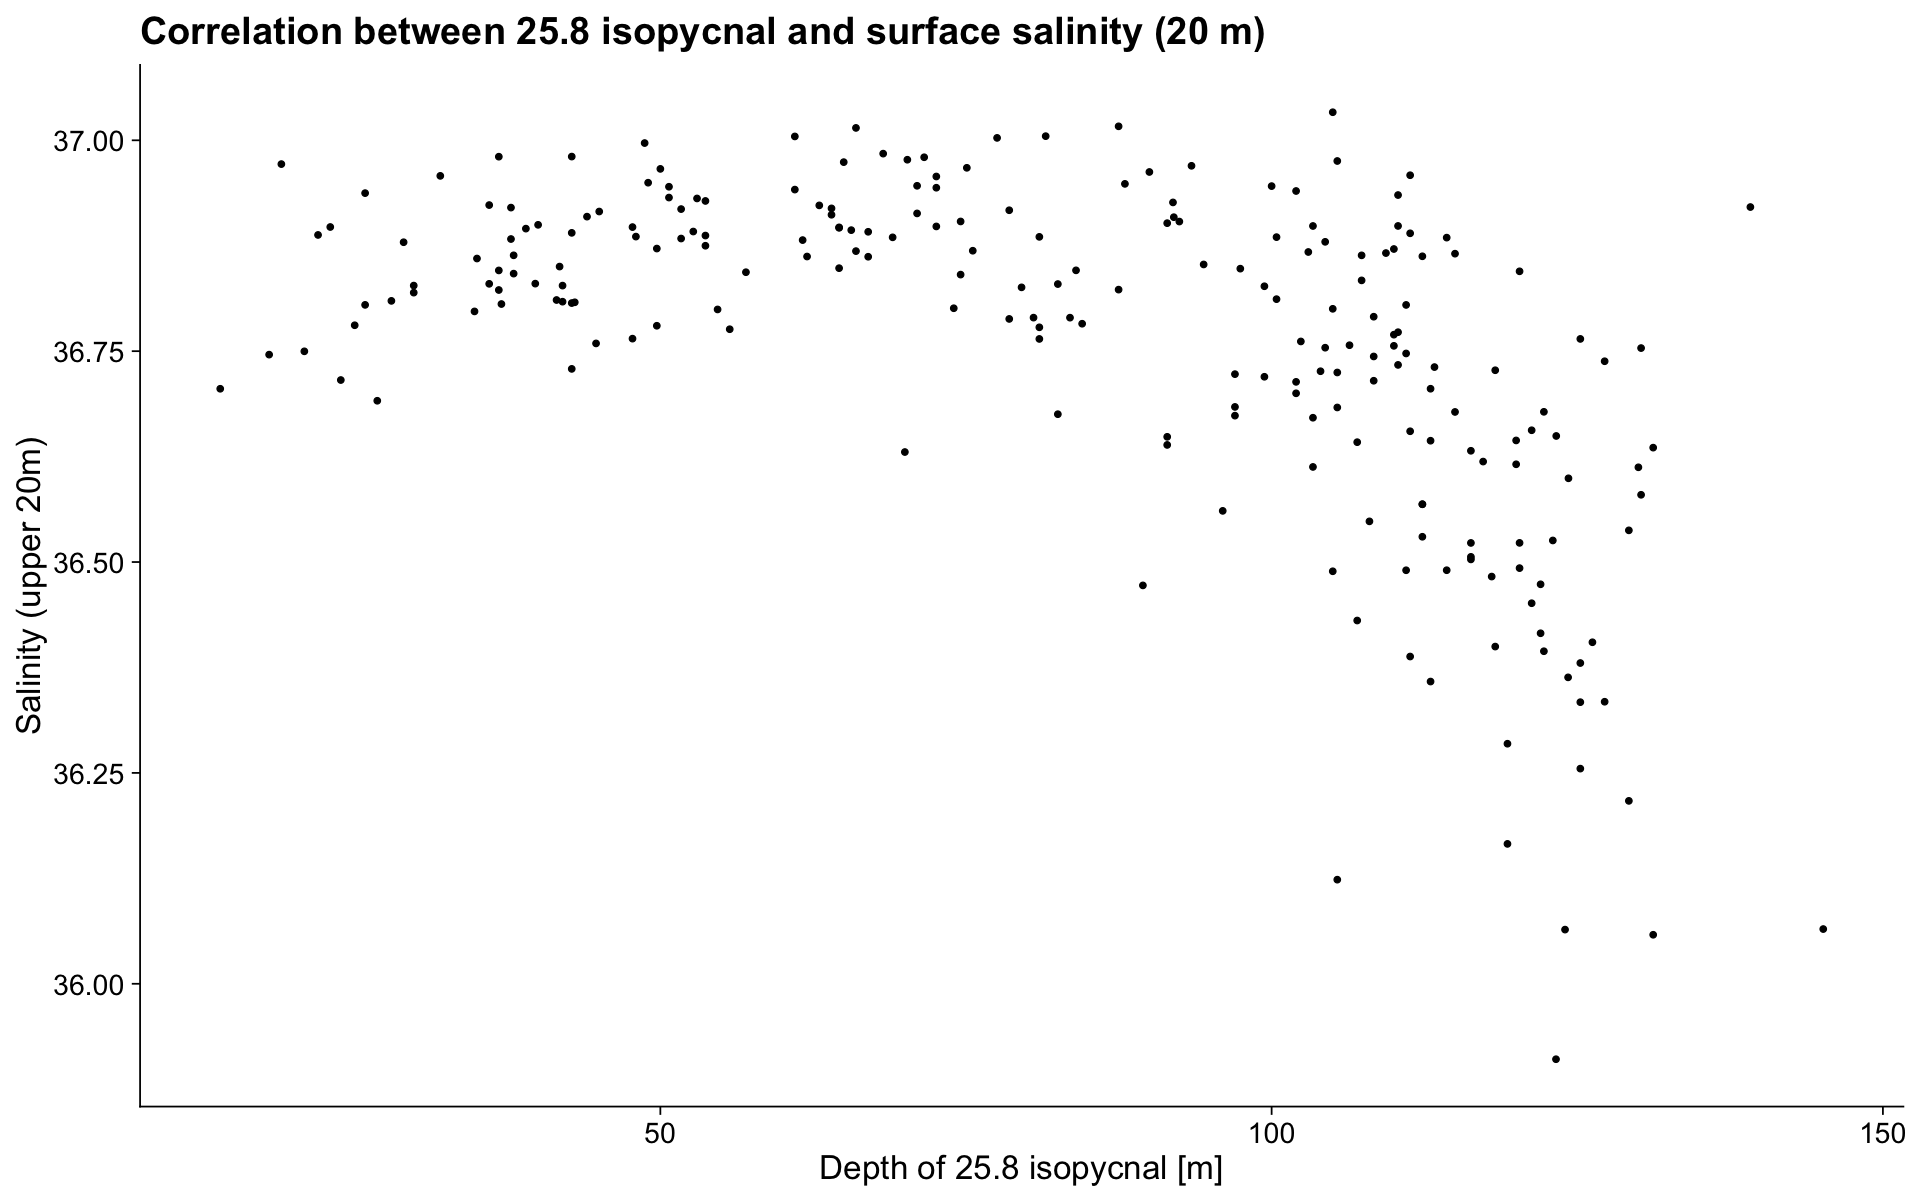

In [75]:
#cor.test(sal_avg100$meansal,CTDx258$depth)

salcomp <- merge(sal_avg100,CTDx258)
length(sal_avg100$meansal)
length(CTDx258$depth)
length(salcomp$depth)

cor.test(salcomp$meansal,salcomp$depth)

ggplot(data=salcomp)+geom_point(aes(x=depth,y=meansal))+theme_cowplot(20) + ggtitle('Correlation between 25.8 isopycnal and surface salinity (20 m)')+
ylab('Salinity (upper 20m)') + xlab('Depth of 25.8 isopycnal [m]')